# Introduction to the DESC Data Challenge 2

**Author**: Javier Sánchez

**Date**: 02-07-2019

In this notebook we are going to give a general overview of what the DESC Data Challenge 2 (DC2) is, what products are available, and how to acess them. We are also going to explain the differences between the different runs and give some examples.

In order to run this notebook, please install the DESC shared kernels. In particular use the `desc-stack` kernel. More info [here](https://confluence.slac.stanford.edu/display/LSSTDESC/DC2+Tutorial%3A+A+Step-by-step+Guide)

## The basics

LSST is planned to map ~20,000 sq-deg of the sky with a median 5-sigma depth of $r \sim 27.5$. This means that the object density and data volume that LSST will handle will greatly surpass any current astronomy experiment (HSC and Hubble have deeper fields but they are not as wide). This increased statistics increase the cosmological sensitivity but, at the same time, this means that we have to be more careful with the treatment of certain systematic effects.

During the Stony Brook collaboration meeting (Summer 2017) the science working groups (SWGs) provided input for the computing working groups (CWGs) about the kind of projects that they are interested in. The CWGs came up with the specifications of cosmological simulations and image simulations to be analyzed by the SWGs and that will provide a controlled dataset in which to study the different effects in which they were interested. These simulations are the products of the data challenge 2. 

The DESC data challenges follow an staged approach in which each data challenge builds upon the previous one. The first DESC data challenge was a simplistic 40 sq-deg image simulation of galaxies from CatSim in a single band and with limited realism.

Some of the study cases proposed by the SWGs required significant improvements in both the realism of the image simulations and the underlying galaxy catalogs. For DC2 we started to make these improvements to fulfill the SWGs needs.

We are going to present the different products available for DC2. More information can be found at:

https://confluence.slac.stanford.edu/display/LSSTDESC/DC2+Data+Product+Overview

### Galaxy catalog

The underlying galaxy catalog is a brand-new state-of-the-art simulation. A 5000 sq-deg *extragalactic catalog* based on the Outer Rim N-Body simulation ([Habib et al 2014](http://arxiv.org/abs/1410.2805)) is planned. The catalog is populated using the Galacticus semi-analytic model ([Benson et al. 2010](https://arxiv.org/abs/1008.1786)) which, in order to scale up to LSST densities is accelerated using an emulation approach called GalSampler (Hearin et al., in prep.). This catalog is the so-called `cosmoDC2`. There are now ~700 sq-deg available `cosmoDC2_v1.1.4`.

This catalog has a higher resolution and more complicated biasing model than the previous CatSim model based on CatSim. Using the galaxies from this extragalactic catalog we started to generate the image simulations.

### Image simulations

Two different software packages were used to generate the DC2 images: PhoSim and imSim. PhoSim ([Peterson et al 2015.](https://arxiv.org/abs/1504.06570)) is a Monte Carlo simulator that simulates photons from different astronomical sources and simulates their interaction with the atmosphere, telescope and camera. The galaxies are modeled as Sérsic (bulge+disk) models and stars are point-like sources. On the other hand imSim (Walter et al., in prep.) is a software package based on GalSim ([Rowe et al. 2015](https://arxiv.org/abs/1407.7676)) that follows a modular approach to generate LSST-like synthetic images. We use information from `lsst_sims` to build the sky-background model (from Yoachim et al.), LSST project optical simulations from Bo Xin to create the optical model (which is added as an extra layer to the atmosphere). The (PSF) atmospheric model is based on PhoSim's model and was developed by Josh Meyers. Effects like cosmic-rays, saturation, the brighter-fatter effect, tree-rings and others were included in imSim for DC2. The galaxies are also represented as Sérsic (bulge+disk) models, and François Lanusse added the functionality to simulate complex galaxy morphologies (also known as *knots*).

### Runs

*Note: The suffix i/p after the run number mark the software that was used to generate the images*

| Name | Extragalactic catalog used | Run | Software | Target area WFD | Target area DDF | Depth WFD | Depth DDF | Realized area | realized depth |
| --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- | --- |
| Run 1.1p | protoDC2 v2.1.2 | 1.1 | PhoSim | 5 deg x 5 deg | 1.1 deg x 1.1 deg | 10 year  (r ~ 27.5, Ivezic et al.) | 10 year DDF (r~28.4 Brandt et al.) | ~25.6 sq-deg | 25.1 (5-sigma r-band) |
| Run 1.2p | protoDC2 v3.0 | 1.2 | PhoSim | 5 deg x 5 deg | 1.1 deg x 1.1 deg | 10 year (r ~ 27.5, Ivezic et al.) | 10 year DDF (r~28.4 Brandt et al.) | ~31.3 sq-deg | 25.9 (5-sigma r-band) | 
| Run 1.2i | protoDC2 v3.0 | 1.2 | ImSim | 5 deg x 5 deg | 1.1 deg x 1.1 deg | 10 year (r ~ 27.5, Ivezic et al.) |10 year DDF (r~28.4 Brandt et al.) |~29.4 sq-deg	 | 25.7 (5-sigma r-band) |
| Run 2.0i | cosmoDC2 v1.0 | 2.0 | ImSim | 300 sq-deg | 1.25 sq-deg | 10 year (r ~ 27.5, Ivezic et al.) | 10 year DDF (r~28.4 Brandt et al.) | 127 focal plane visits | ~24.5 (5-sigma r-band, single visit) |
| Run 2.1i | cosmoDC2 v1.1.4 | 2.1 | ImSim | TBA | TBA | TBA | TBA |  ~ 1000 single visits | ~24.5 (5-sigma r-band, single visit) | 

### Products

See [here](https://confluence.slac.stanford.edu/display/LSSTDESC/DC2+Data+Product+Overview) for full description but as a brief summary we have:

Boldface catalogs are the most commonly used.

* **Extragalactic catalog**: The "clean" catalog from the cosmological simulation. This is used as input for the image simulations. Access through `GCR` (the catalogs are either HDF5 files or FITS files).

* Instance catalogs: These are catalogs formatted for imSim and PhoSim to generate the images and they use and translate the information from the extragalactic catalog to be understood by the image generation software. Access using `GCR` or reading the text files.

* **Truth catalog**: This is the version of the extragalactic catalog with the conversions made at the instance catalog stage and they should be used as "ground truth". Access through `GCR`.

* `calexp`: Calibrated exposure, single-visit images. They can be accessed using the DM `Butler` (they are `fits` files).

* `calexp_src`: The source catalog resulting from processing (detection+deblending+measurement) the `calexp`. Access using the `Butler`, `GCR` (they also are fits files).

* `deepCoadd`: Coadd image. The can be accessed using the `Butler` (also `fits` files).

* `deepCoadd_meas`: Source catalog resulting from processing the `deepCoadd`. Access using the `Butler` (also with `GCR` but configuration files needed, they are also `.fits` files).

* **Object catalog**: Pre-ingested catalog from the `merged` forced photometry catalog. These are the catalogs that most people will use. They can be accessed through `GCR`.

## Hands-on with DC2

The goal of this notebook is to give a wide overview of how to access different data products and show some cool 

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


We are going to import the packages needed to access the different data products. In particular [`GCRCatalogs`](https://github.com/LSSTDESC/gcr-catalogs), and the DM [`Butler`](https://pipelines.lsst.io/getting-started/data-setup.html?highlight=butler) 

`GCRCatalogs` already knows the location of the different data products. If you use the `Butler` you need to know the path of the data products that you want to access.

In [3]:
import GCRCatalogs
import GCR
from lsst.daf.persistence import Butler

We define the function below to show the images and the centroid position as detected or as input.

In [4]:
from lsst.geom import SpherePoint, Point2D, Angle
import lsst.geom

In [5]:
from astropy.visualization import ZScaleInterval, ImageNormalize, SqrtStretch
def plot_ref_image(xmin, xmax, ymin, ymax, reference,
                   x, y, x2, y2, mag_true, mag_meas,
                   savename, vmin=-5, vmax=5, show_marker=True):
    """Routine to produce plots of the image in a region from xmin
    to xmax, and ymin to ymax of the reference image
    and annotating the position of three more different catalogs
    (for example input objects, detected stars, and detected galaxies)

    Args:
    ----
        xmin: `float` minimum X position in the chip to be shown
        xmax: `float` maximum X position in the chip to be shown
        ymin: `float` minimum Y position in the chip to be shown
        ymax: `float` maximum Y position in the chip to be shown
        reference: `HDU` HDU containing the image to be analyzed
        x, x2: `float` arrays of X positions to be marked on the image
        y, y2: `float` arrays of Y positions to be marked on the image
        mag_true: `float` array with the true magnitude of the objects
        mag_meas: `float` array with the measured magnitdue of the objects
        vmin: `float` minimum of the color scale
        vmax: `float` maximum of the color scale
    """
    fig, ax = plt.subplots(ncols=1,figsize=(14,14))
    plt.xlim(xmin,xmax)
    plt.ylim(ymin,ymax)
    if show_marker:
        im0 = ax.scatter(x+1,y+1,c=mag_true,label='True',s=120,marker='x',vmin=10,vmax=30)
        fig.colorbar(im0, ax=ax, shrink=1,label='mag')
        im1 = ax.scatter(x2+1,y2+1,c=mag_meas,label='Measured',s=120,marker='+',vmin=10,vmax=30)
    ax.grid()
    plt.legend(loc='best')
    im = ax.imshow(reference[ymin:ymax,xmin:xmax],extent=[xmin,xmax,ymin,ymax],cmap='gray', origin="lower",vmin=vmin,vmax=vmax, interpolation='none')
    fig.colorbar(im, ax=ax, shrink=1,label='Pixel counts [ADU]')
    fig.savefig(savename)

In [ ]:
# Let's check what catalogs are available
GCRCatalogs.available_catalogs

We load the truth catalog and the object catalog

In [6]:
cosmo_catalog = GCRCatalogs.load_catalog('dc2_truth_run1.2_static')

In [7]:
obj_catalog = GCRCatalogs.load_catalog('dc2_object_run1.2i')

We can see the quantities defined in each catalog with the `list_all_quantities` attribute

In [ ]:
cosmo_catalog.list_all_quantities()

In [ ]:
obj_catalog.list_all_quantities()

And we are going to load an image (and its WCS) using the `Butler`

All the DC2 data lives under `/global/cscratch1/sd/desc/DC2/data` at NERSC but we are interested in a particular dataset (single visits of Run1.2i)

In [8]:
data_path = '/global/cscratch1/sd/desc/DC2/data/Run1.2i/rerun/281118'

In [9]:
butler = Butler(data_path)

At the coadd level, the sky is divided in *tracts* and each tract is divided in *patches*.

The information about tracts and patches in contained in the `skymap` object

At the calexp level we need the information about the visits. These are all contained in the `calexp` subset.

In [10]:
datarefs = butler.subset('calexp')

`datarefs.cache` contains all the visits in the registry

In [ ]:
#skymap = butler.get('deepCoadd_skyMap') # In case that we want to explore the skymap

In [11]:
calexp = butler.get('calexp',datarefs.cache[1220])

We open now the source catalog (the objects detected and measured from the calexp). In order to check which columns are available you can use the command: `src.schema`

In [12]:
src = butler.get('src', datarefs.cache[1220])

We extract the WCS to convert from ra, dec to pixel coordinates (and viceversa)

In [13]:
wcs = calexp.getWcs()

In [14]:
origin = wcs.getSkyOrigin()

In [15]:
wcs.getPixelOrigin()

Point2D(2123.558277, 1992.740607)

In [16]:
ra0 = origin.getRa().asDegrees()
dec0 = origin.getDec().asDegrees()

In [17]:
calexp.getDimensions()

Extent2I(4072, 4000)

We are only going to query the catalogs $\sim 0.3$ deg around the origin (the coadd images are 4200 x 4200 pixels and each pixel is 0.2")

In [18]:
query_condition = GCR.GCRQuery('ra >= %f' %(ra0-0.3),'ra <= %f' % (ra0+0.3), 
                               'dec >= %f' %(dec0-0.3), 'dec <= %f' % (dec0+0.3))

In [19]:
data_true = cosmo_catalog.get_quantities(['ra','dec','mag_true_r'], query_condition)
data_meas = obj_catalog.get_quantities(['ra','dec','mag_r_cModel','snr_r_cModel'], query_condition)

In [20]:
len(data_true['ra']), len(data_meas['ra'])

(54999, 22091)

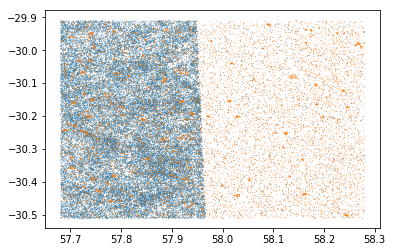

In [26]:
plt.scatter(data_true['ra'], data_true['dec'], s=0.01)
plt.scatter(data_meas['ra'], data_meas['dec'], s=0.01)

Note the stark difference in number of objects between the truth catalog and the object catalog!

The different footprint is due to the fact that part of the sensor lies beyond the protoDC2 catalog (so there are only stars).

Now we are going to convert the `ra`,`dec` coordinates to coordinates in the image using the `wcs`. The `x,y` measured centroids are available in the object catalog but not in the truth catalog!

In [27]:
def get_xy(ra_arr, dec_arr, wcs):
    """ Function to get x,y coordinates from ra and dec
    There's probably a more elegant way to do this...
    """
    try:
        assert(len(ra_arr) == len(dec_arr))
    except AssertionError:
        'ra_arr and dec_arr should have the same length'
    x = np.zeros(len(ra_arr))
    y = np.zeros_like(x)
    sphere_point = []
    for i in range(len(ra_arr)):
        ra = Angle(ra_arr[i], units=lsst.geom.angle.degrees)
        dec = Angle(dec_arr[i], units=lsst.geom.angle.degrees)
        sphere_point.append(SpherePoint(ra, dec))
    xy_list = wcs.skyToPixel(sphere_point)
    for i, point in enumerate(xy_list):
        x[i] = point.getX()
        y[i] = point.getY()
    return x,y

In [28]:
x_true, y_true = get_xy(data_true['ra'], data_true['dec'], wcs)

In [29]:
x_meas_coadd, y_meas_coadd = get_xy(data_meas['ra'], data_meas['dec'], wcs)

Note that there are `x,y` coordinates in the object catalog but they refer to the position in the coadd!

In [30]:
x_src = src.get('base_SdssCentroid_x')
y_src = src.get('base_SdssCentroid_y')
calib = calexp.getCalib()
calib.setThrowOnNegativeFlux(False)
mag_meas = calib.getMagnitude(src.get('ext_photometryKron_KronFlux_instFlux'))

In [31]:
reference = calexp.getImage().array

We show bright sources only ($r < 22$)

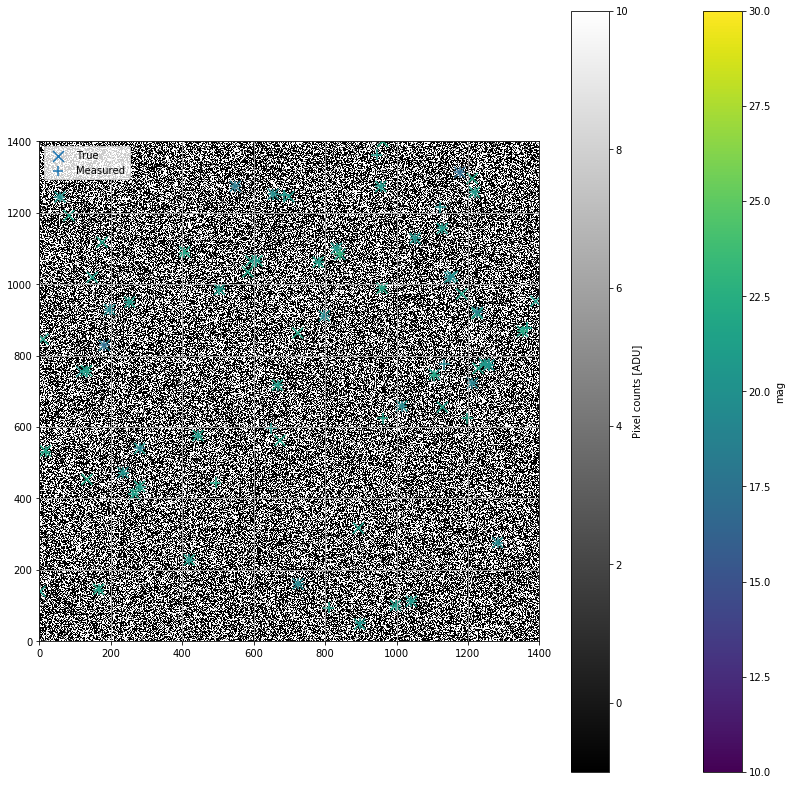

In [34]:
plot_ref_image(0, 1400, 0, 1400, reference, 
               x_true[data_true['mag_true_r']<22], y_true[data_true['mag_true_r']<22], x_src, y_src, 
               data_true['mag_true_r'][data_true['mag_true_r']<22], mag_meas, 'test.png',
               vmin=-1, vmax=10, show_marker=True)